<a href="https://colab.research.google.com/github/jackliuuu/tf_model_scrapy_practice/blob/master/dog_classication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
train_data_gen=ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        validation_split=0.2,
        horizontal_flip=True)
train_generator=train_data_gen.flow_from_directory(directory='/content/drive/My Drive/train_data',
                                                   target_size=(64,64),batch_size=50,
                                                   class_mode='categorical' )

Found 1194 images belonging to 4 classes.


In [198]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/My Drive/train_data',
  validation_split=0.25,
  subset="training",
  seed=123,
  image_size=(64, 64),
  batch_size=30)



Found 1194 files belonging to 4 classes.
Using 896 files for training.


In [199]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/My Drive/train_data',
  validation_split=0.25,
  subset="validation",
  seed=123,
  image_size=(64, 64),
  batch_size=30)



Found 1194 files belonging to 4 classes.
Using 298 files for validation.


In [200]:
class_names = train_ds.class_names
print(class_names)

['dog1', 'dog2', 'dog3', 'dog4']


In [201]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(64,64, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(784,activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(4, activation='softmax')])

In [ ]:
reduce_lr=tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.3, patience=3, verbose=1, mode='auto', cooldown=0, min_lr=0.00001
)

In [204]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [205]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_37 (Rescaling)     (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_117 (MaxPoolin (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_118 (MaxPoolin (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_119 (MaxPoolin (None, 8, 8, 32)        

In [206]:
epochs=200
history = model.fit(
  train_ds,
  validation_data=val_ds,
  verbose=1,
  #callbacks=[reduce_lr],
  epochs=epochs
)

Epoch 1/200
30/30 [==============================] - 2s 73ms/step - loss: 1.3803 - accuracy: 0.2545 - val_loss: 1.3809 - val_accuracy: 0.3322
Epoch 2/200
30/30 [==============================] - 0s 12ms/step - loss: 1.3545 - accuracy: 0.3259 - val_loss: 1.3650 - val_accuracy: 0.3456
Epoch 3/200
30/30 [==============================] - 0s 11ms/step - loss: 1.3844 - accuracy: 0.2801 - val_loss: 1.3581 - val_accuracy: 0.3188
Epoch 4/200
30/30 [==============================] - 0s 10ms/step - loss: 1.3461 - accuracy: 0.3616 - val_loss: 1.3226 - val_accuracy: 0.3691
Epoch 5/200
30/30 [==============================] - 0s 10ms/step - loss: 1.3151 - accuracy: 0.3817 - val_loss: 1.3247 - val_accuracy: 0.3221
Epoch 6/200
30/30 [==============================] - 0s 11ms/step - loss: 1.3215 - accuracy: 0.3627 - val_loss: 1.4142 - val_accuracy: 0.2617
Epoch 7/200
30/30 [==============================] - 0s 10ms/step - loss: 1.3173 - accuracy: 0.3951 - val_loss: 1.2723 - val_accuracy: 0.4329
Epoch 

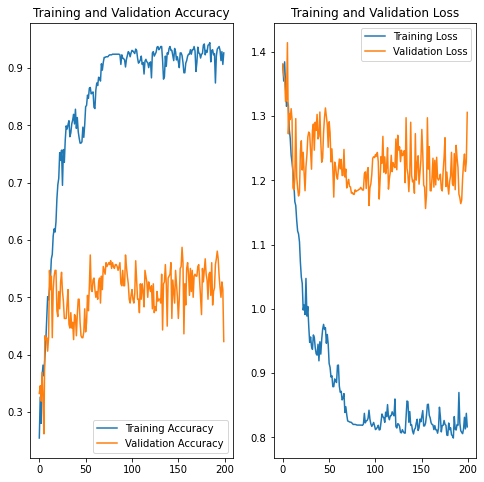

In [208]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# 使用模型來判斷測試圖片



In [221]:
test=['吉娃娃','柯基','馬爾濟斯','哈士奇']#吉娃娃是dog1,柯基是dog2,馬爾濟斯是dog3,哈士奇是dog4
for i in test:
  img1= keras.preprocessing.image.load_img(
    '/content/{}.jpg'.format(i), target_size=(64, 64)
  )
  img_array = keras.preprocessing.image.img_to_array(img1)
  img_array = tf.expand_dims(img_array, 0)
  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))

This image most likely belongs to dog1 with a 47.54 percent confidence.
This image most likely belongs to dog2 with a 46.35 percent confidence.
This image most likely belongs to dog4 with a 47.05 percent confidence.
This image most likely belongs to dog4 with a 47.54 percent confidence.
